### Pandas
Check the [documentation](https://pandas.pydata.org/pandas-docs/stable/)

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filename = ('data/csv_example.csv')
mydata = pd.read_csv(filename)
print(type(mydata))
print(len(mydata))
%time _ = pd.read_csv(filename)
mydata.info

<class 'pandas.core.frame.DataFrame'>
15005
CPU times: user 4.47 ms, sys: 3.78 ms, total: 8.25 ms
Wall time: 8.09 ms


<bound method DataFrame.info of                    time  value
0      2012-10-10 02:00   0.08
1      2012-10-10 04:00   0.08
2      2012-10-10 06:00   0.08
3      2012-10-10 08:00   0.08
4      2012-10-10 10:00   0.08
5      2012-10-10 12:00   0.08
6      2012-10-10 14:00   0.08
7      2012-10-10 16:00   0.08
8      2012-10-10 18:00   0.08
9      2012-10-10 20:00   0.05
10     2012-10-10 22:00   0.05
11     2012-10-11 00:00   0.08
12     2012-10-11 02:00   0.05
13     2012-10-11 04:00   0.05
14     2012-10-11 06:00   0.05
15     2012-10-11 08:00   0.05
16     2012-10-11 10:00   0.05
17     2012-10-11 12:00   0.05
18     2012-10-11 14:00   0.05
19     2012-10-11 16:00   0.05
20     2012-10-11 18:00   0.05
21     2012-10-11 20:00   0.05
22     2012-10-11 22:00   0.05
23     2012-10-12 00:00   0.05
24     2012-10-12 02:00   0.02
25     2012-10-12 04:00   0.02
26     2012-10-12 06:00   0.05
27     2012-10-12 08:00   0.02
28     2012-10-12 10:00   0.02
29     2012-10-12 12:00   0.02
...    

In [3]:
print(mydata.columns)
print(mydata.dtypes)
print(mydata.shape)
print(mydata.size)
print(mydata.values)

Index(['time', 'value'], dtype='object')
time      object
value    float64
dtype: object
(15005, 2)
30010
[['2012-10-10 02:00' 0.08]
 ['2012-10-10 04:00' 0.08]
 ['2012-10-10 06:00' 0.08]
 ...
 ['2016-09-18 00:00' 1.3]
 ['2016-09-18 04:00' 1.3]
 ['2016-09-18 08:00' 1.3]]


In [4]:
mydata.time[1045]

'2013-01-05 04:00'

In [5]:
mydata.value[1045]

-2.68

In [6]:
mydata.at[1045,'time']

'2013-01-05 04:00'

In [7]:
print(mydata.index)

RangeIndex(start=0, stop=15005, step=1)


In [8]:
mydata.index = pd.to_datetime(mydata.pop('time'))
print(mydata.index)

DatetimeIndex(['2012-10-10 02:00:00', '2012-10-10 04:00:00',
               '2012-10-10 06:00:00', '2012-10-10 08:00:00',
               '2012-10-10 10:00:00', '2012-10-10 12:00:00',
               '2012-10-10 14:00:00', '2012-10-10 16:00:00',
               '2012-10-10 18:00:00', '2012-10-10 20:00:00',
               ...
               '2016-09-16 20:00:00', '2016-09-17 00:00:00',
               '2016-09-17 04:00:00', '2016-09-17 08:00:00',
               '2016-09-17 12:00:00', '2016-09-17 16:00:00',
               '2016-09-17 20:00:00', '2016-09-18 00:00:00',
               '2016-09-18 04:00:00', '2016-09-18 08:00:00'],
              dtype='datetime64[ns]', name='time', length=15005, freq=None)


In [9]:
print(mydata.columns)
print(mydata.dtypes)
print(mydata.shape)
print(mydata.size)
print(mydata.values)
mydata.value['2012-10-14 20:00']

Index(['value'], dtype='object')
value    float64
dtype: object
(15005, 1)
15005
[[0.08]
 [0.08]
 [0.08]
 ...
 [1.3 ]
 [1.3 ]
 [1.3 ]]


0.0

In [10]:
mymaskeddata = mydata.mask(mydata == 0.0)
print(mymaskeddata.count())
mymaskeddata.value['2012-10-14 20:00']

value    13884
dtype: int64


nan

In [11]:
mymaskeddata.value['2016-09-18']

time
2016-09-18 00:00:00    1.3
2016-09-18 04:00:00    1.3
2016-09-18 08:00:00    1.3
Name: value, dtype: float64

In [12]:
interpdata = mymaskeddata.interpolate(method='nearest')
interpdata.value['2012-10-14 20:00']

0.02

In [13]:
interpdata.asfreq('1h')

,value
time,
2012-10-10 02:00:00,0.08
2012-10-10 03:00:00,NaN
2012-10-10 04:00:00,0.08
2012-10-10 05:00:00,NaN
2012-10-10 06:00:00,0.08
2012-10-10 07:00:00,NaN
2012-10-10 08:00:00,0.08
2012-10-10 09:00:00,NaN
2012-10-10 10:00:00,0.08


In [16]:
interpdata.value.resample('Y').fillna(method='nearest')

time
2012-12-31   -0.73
2013-12-31   -0.06
2014-12-31   -0.10
2015-12-31   -0.10
2016-12-31    1.30
Freq: A-DEC, Name: value, dtype: float64

In [17]:
interpdata.value.resample('D').fillna(method='nearest')

time
2012-10-10    0.08
2012-10-11    0.08
2012-10-12    0.05
2012-10-13    0.02
2012-10-14    0.02
2012-10-15    0.02
2012-10-16    0.02
2012-10-17   -0.03
2012-10-18   -0.03
2012-10-19   -0.03
2012-10-20   -0.03
2012-10-21   -0.03
2012-10-22   -0.03
2012-10-23   -0.03
2012-10-24   -0.03
2012-10-25   -0.03
2012-10-26   -0.03
2012-10-27   -0.03
2012-10-28   -0.03
2012-10-29   -0.03
2012-10-30   -0.03
2012-10-31   -0.03
2012-11-01   -0.03
2012-11-02   -0.03
2012-11-03   -0.03
2012-11-04   -0.03
2012-11-05   -0.03
2012-11-06   -0.03
2012-11-07   -0.03
2012-11-08   -0.03
              ... 
2016-08-20    2.60
2016-08-21    2.60
2016-08-22    2.60
2016-08-23    2.60
2016-08-24    2.60
2016-08-25    2.60
2016-08-26    2.60
2016-08-27    2.60
2016-08-28    2.50
2016-08-29    2.40
2016-08-30    2.20
2016-08-31    2.00
2016-09-01    2.00
2016-09-02    2.00
2016-09-03    2.00
2016-09-04    2.10
2016-09-05    2.10
2016-09-06    2.10
2016-09-07    2.10
2016-09-08    2.10
2016-09-09    2.10
2016-09

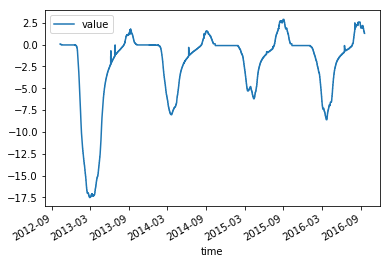

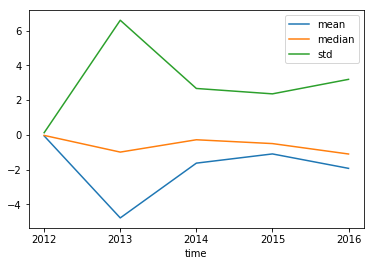

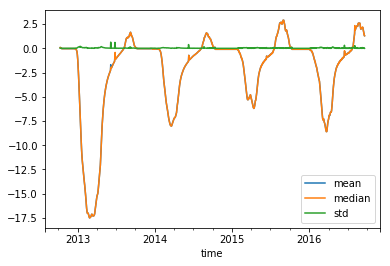

In [18]:
y_mean = interpdata.value.resample('Y').apply(['mean','median','std'])
d_mean = interpdata.value.resample('D').apply(['mean','median','std'])
interpdata.plot()
y_mean.plot()
d_mean.plot()